In [35]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [36]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Etap 2: Zrozumienie danych

In [37]:
# Scalanie X i y w jeden dataframe
df = pd.concat([X, y], axis=1)

# Wyświetlenie kilku pierwszych wierszy danych
print(df.head())

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


In [38]:
# Wyświetlenie informacji o danych
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB
None


In [39]:
# Statystyki opisowe dla danych
print(df.describe())

             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357    

In [40]:
# Sprawdzanie brakujących wartości
print(df.isnull().sum())

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


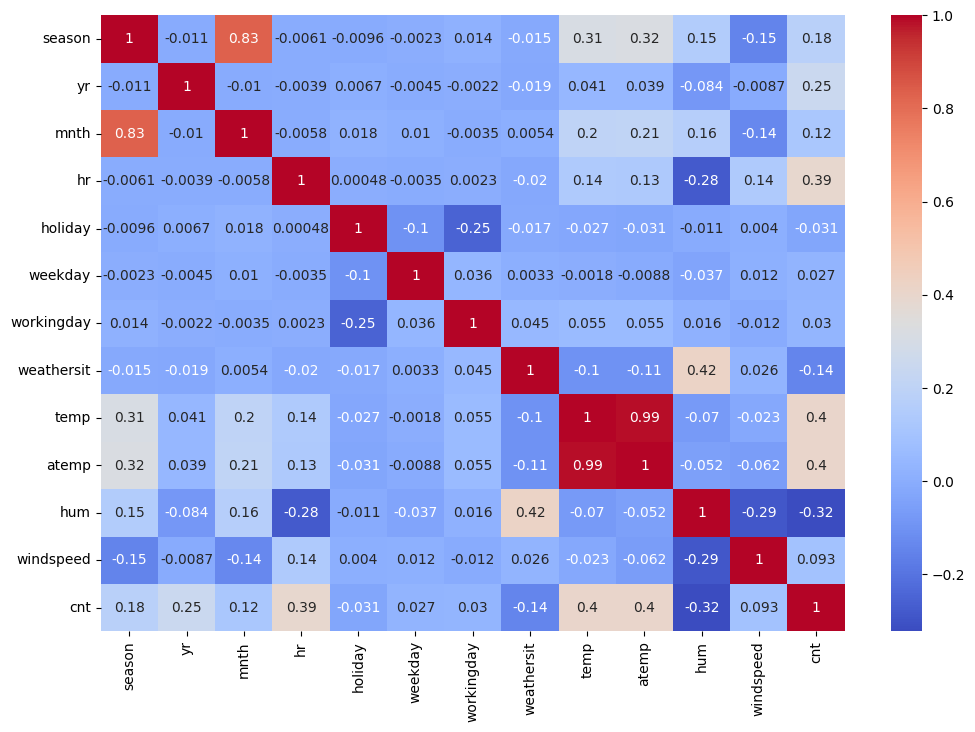

       feature         VIF
0       season   21.270435
1           yr    2.103410
2         mnth   15.159659
3           hr    4.325578
4      holiday    1.096586
5      weekday    3.060167
6   workingday    3.236312
7   weathersit    7.601280
8         temp  320.516674
9        atemp  354.982881
10         hum   13.169419
11   windspeed    3.260630
12         cnt    3.418984


In [41]:
df_bckup = df.copy()
df=df.drop(['dteday'],axis=1)

# Analiza korelacji
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor

# X - macierz zmiennych objaśniających (bez stałej)
# Możesz użyć biblioteki statsmodels do obliczenia VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

print(vif_data)

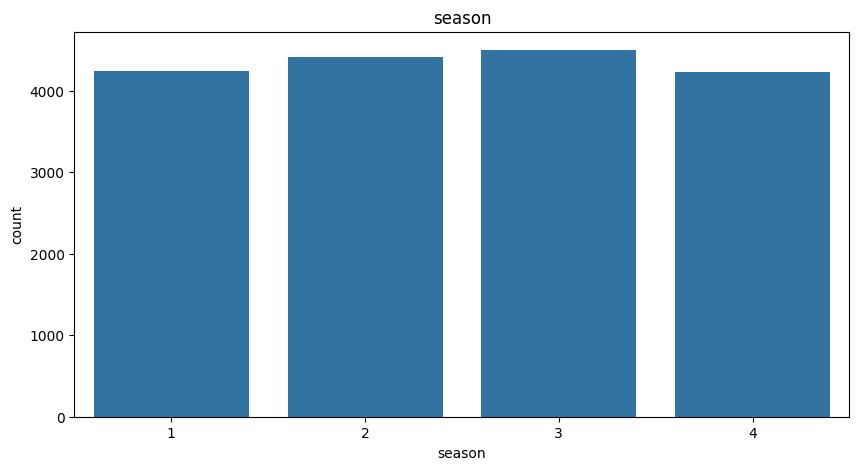

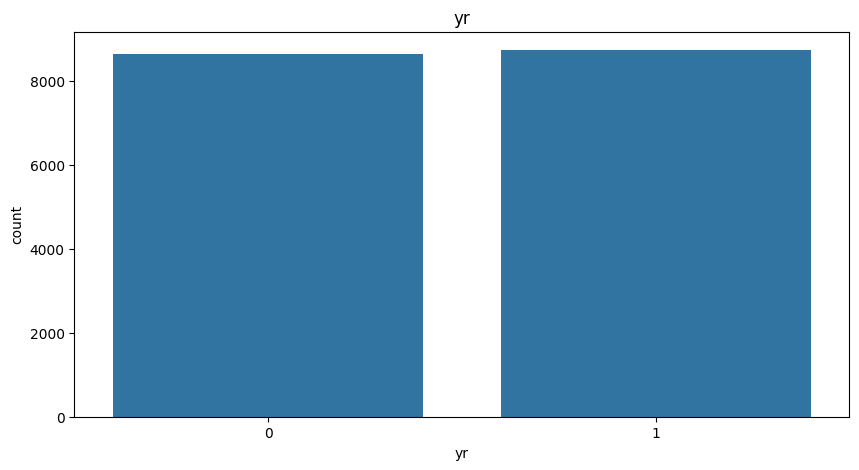

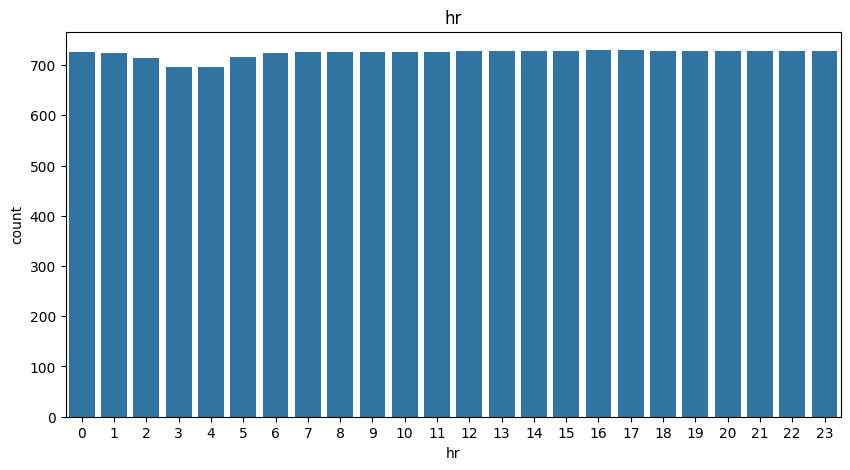

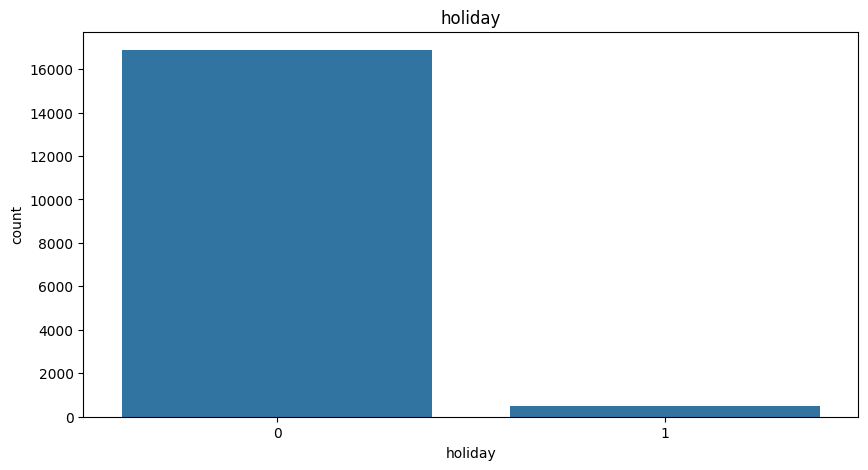

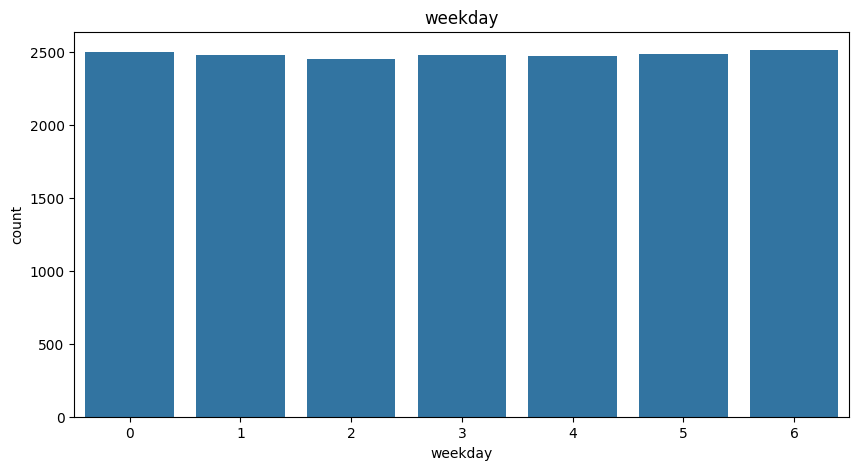

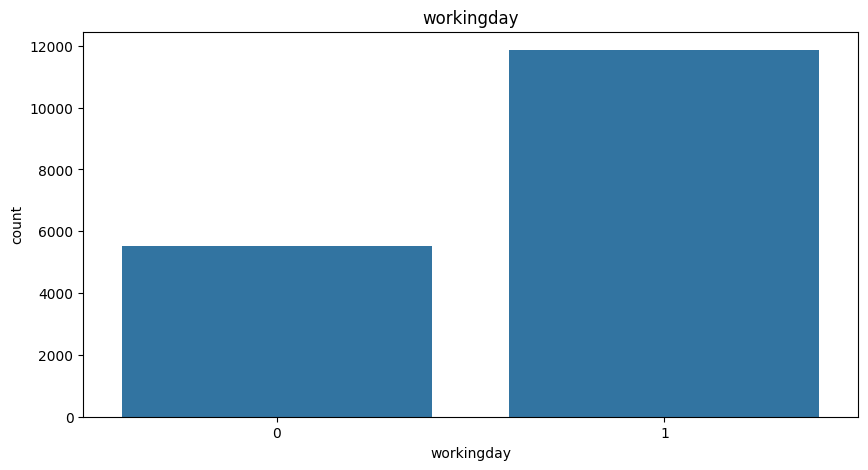

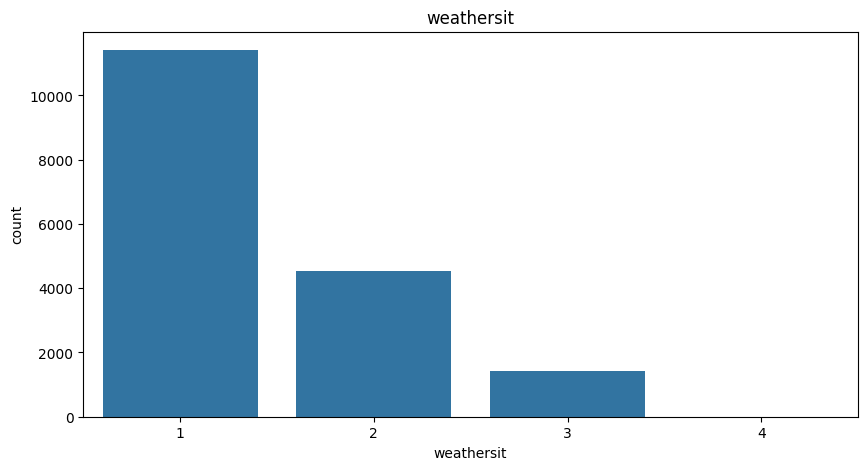

In [42]:
df=df.drop(['atemp'],axis=1)
df=df.drop(['mnth'],axis=1)

# Analiza zmiennych kategorycznych
categorical_columns = ['season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sb.countplot(x=col, data=df)
    plt.title(col)
    plt.show()


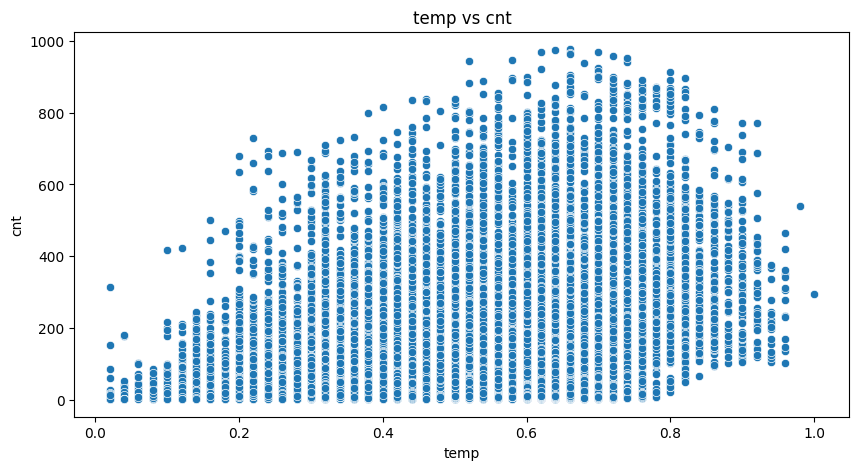

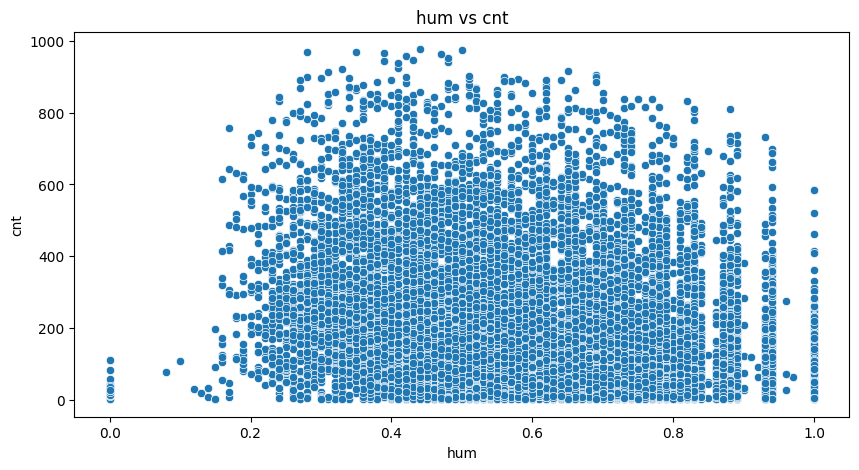

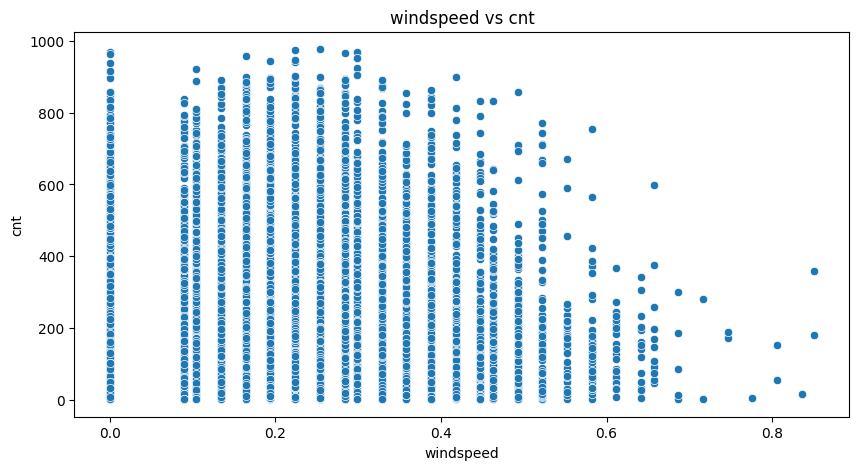

In [43]:
# Analiza wpływu zmiennych na zmienną docelową
numerical_columns = ['temp', 'hum', 'windspeed']
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sb.scatterplot(x=col, y='cnt', data=df)
    plt.title(f'{col} vs cnt')
    plt.show()

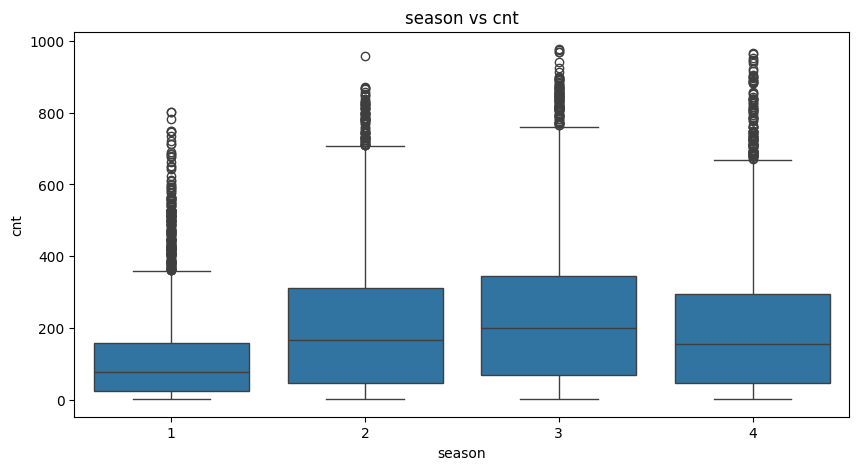

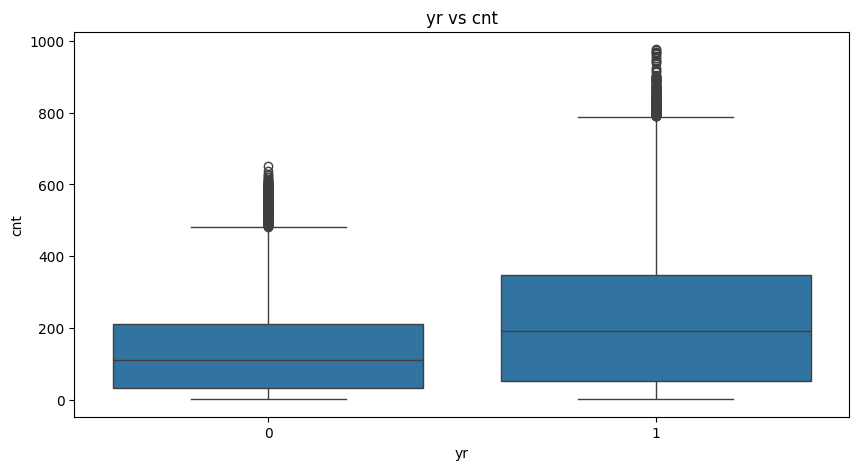

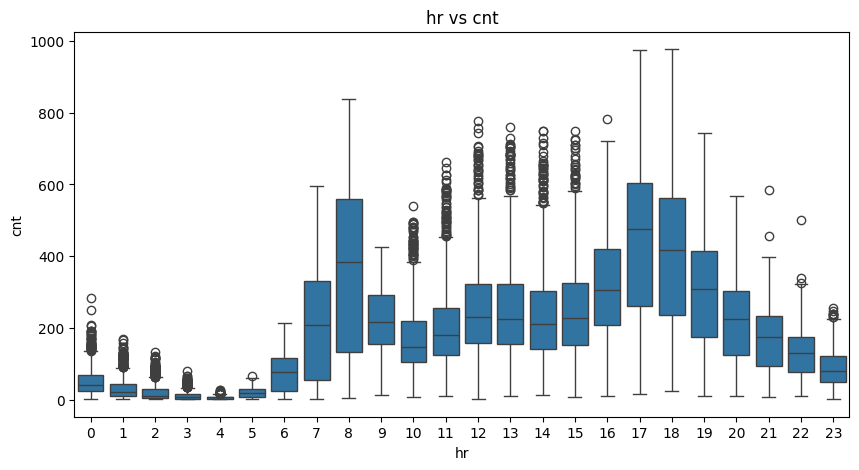

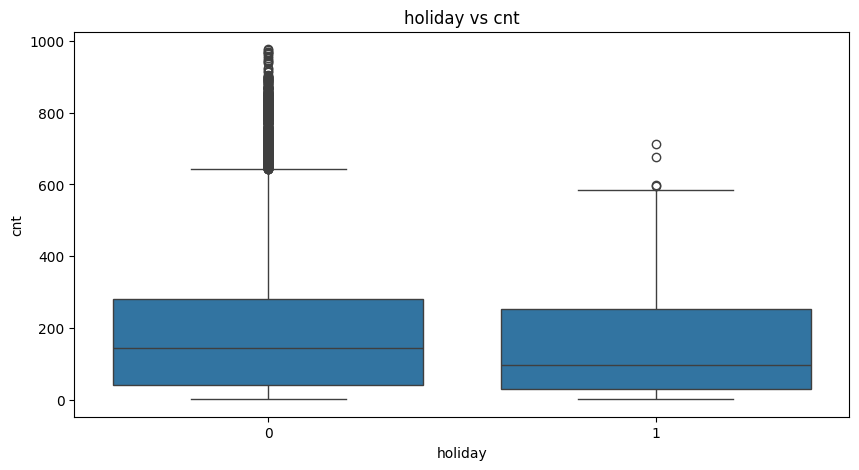

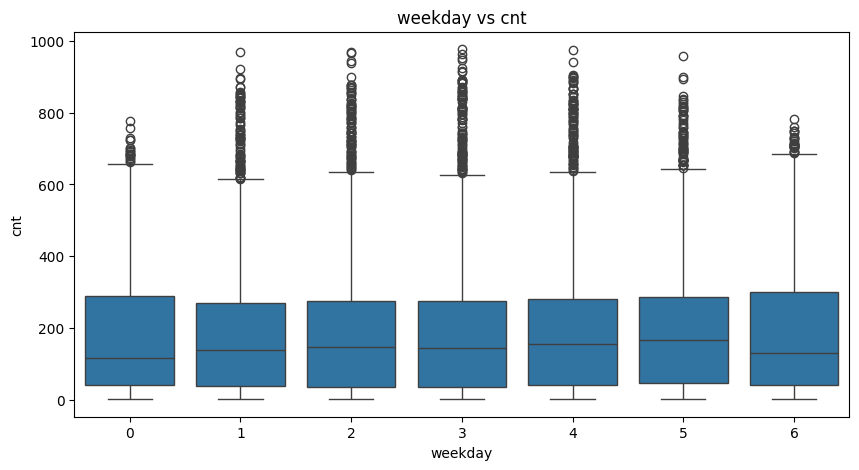

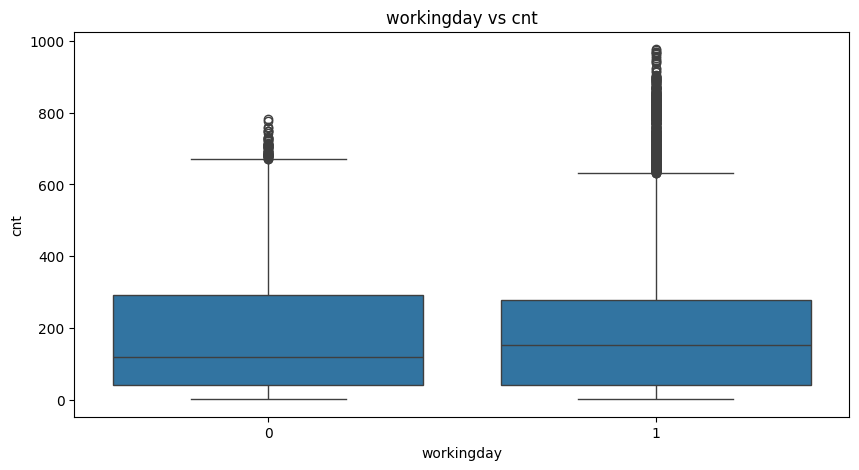

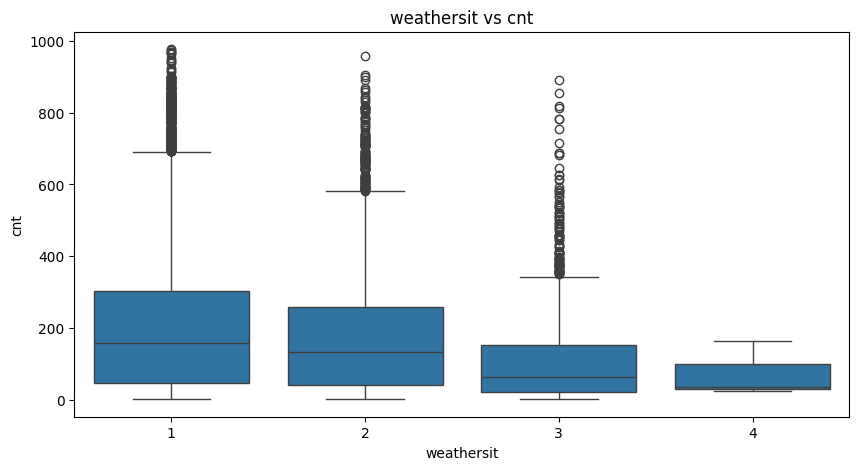

In [44]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sb.boxplot(x=col, y='cnt', data=df)
    plt.title(f'{col} vs cnt')
    plt.show()

3 Etap : Przygotowanie danych

In [45]:
# Tworzymy zmapowaną kolumnę
df['hour_mapped'] = df['hr'].map(lambda x: 'hour_' + str(x))
df=df.drop(['hr'],axis=1)

df = pd.get_dummies(df, columns=['hour_mapped'], dtype=int)

In [47]:
# Zmienne kategoryczne dla różnych kolumn
df = pd.get_dummies(df, columns=['season'], dtype=int)
df = df.rename(columns={"season_1": "winter"})
df = df.rename(columns={"season_2": "spring"})
df = df.rename(columns={"season_3": "summer"})
df = df.rename(columns={"season_4": "fall"})

df = pd.get_dummies(df, columns=['yr'], dtype=int)
df = df.rename(columns={"yr_0": "2010"})
df = df.rename(columns={"yr_1": "2011"})

df = pd.get_dummies(df, columns=['weekday'], dtype=int)

df = pd.get_dummies(df, columns=['weathersit'], dtype=int)
df = df.rename(columns={"weathersit_1": "Clear"})
df = df.rename(columns={"weathersit_2": "Mist"})
df = df.rename(columns={"weathersit_3": "Light Snow"})
df = df.rename(columns={"weathersit_4": "Heavy Rain"})

4. model_log_log_logowanie

In [48]:
df['cnt_log'] = df['cnt'].apply(lambda x: np.log(x))

y = df['cnt']
y_log = df['cnt_log']
X = df.drop(columns=['cnt', 'cnt_log'])

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)


Mean Squared Error (MSE): 10199.80548762946
R-squared (R^2): 0.6778881101763452


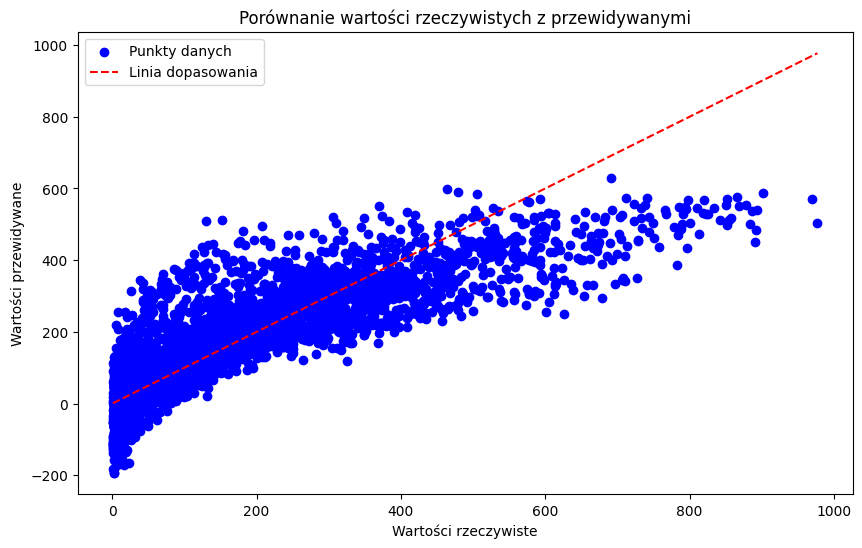

Mean Absolute Error (MAE): 74.01452819332566
Mean Squared Error (MSE): 10199.80548762946
Root Mean Squared Error (RMSE): 100.99408639930093
R-squared (R^2): 0.6778881101763452


In [49]:
# Inicjalizacja modelu regresji liniowej
model = LinearRegression()

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = model.predict(X_test)

# Obliczanie błędu średniokwadratowego (MSE)
mse = mean_squared_error(y_test, y_pred)

# Obliczanie współczynnika determinacji (R^2)
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(mse)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Punkty danych')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linia dopasowania')
plt.title('Porównanie wartości rzeczywistych z przewidywanymi')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.legend()
plt.show()

# Wyświetlenie dodatkowych metryk
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 63890.19671824448
R-squared (R^2): -1.0176651438185176


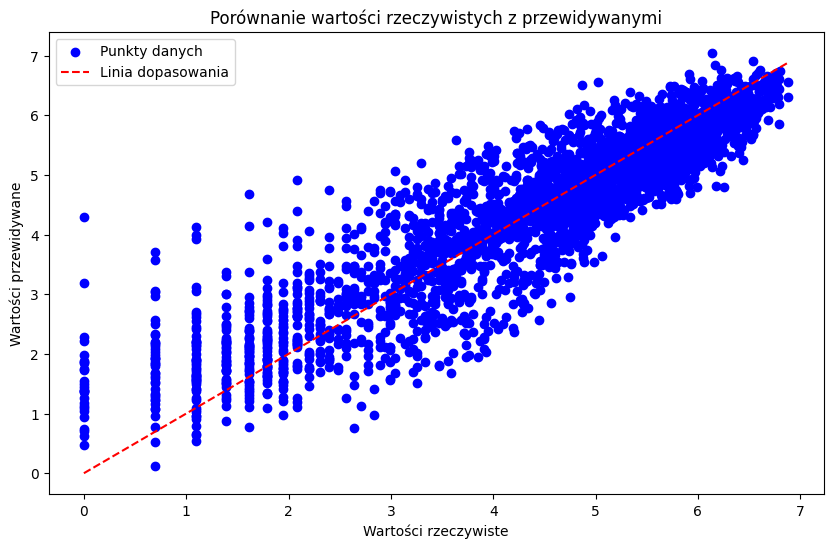

Mean Absolute Error (MAE): 180.4945642890535
Mean Squared Error (MSE): 63890.19671824448
Root Mean Squared Error (RMSE): 252.76510185989773
R-squared (R^2): -1.0176651438185176


In [51]:
# Inicjalizacja modelu regresji liniowej
model_log = LinearRegression()

# Trenowanie modelu na danych treningowych
model_log.fit(X_train, y_train_log)

# Przewidywanie na danych testowych
y_pred_log = model_log.predict(X_test)

# Obliczanie błędu średniokwadratowego (MSE)
mse = mean_squared_error(y_test_log, y_pred_log)

# Obliczanie współczynnika determinacji (R^2)
r2 = r2_score(y_test_log, y_pred_log)

# Wyświetlenie wyników
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

mae = np.mean(np.abs(y_test_log - y_pred_log))
rmse = np.sqrt(mse)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log, y_pred_log, color='blue', label='Punkty danych')
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], color='red', linestyle='--', label='Linia dopasowania')
plt.title('Porównanie wartości rzeczywistych z przewidywanymi')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.legend()
plt.show()

# Wyświetlenie dodatkowych metryk
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

In [50]:
import statsmodels.api as sm

# Przygotowanie modelu
model = sm.OLS(y_train, X_train)

# Trenowanie modelu
result = model.fit()

# Podsumowanie modelu
print(result.summary())
with open('summary.txt', 'w') as f:
    f.write(result.summary().as_text())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     744.8
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:08:34   Log-Likelihood:                -84121.
No. Observations:               13903   AIC:                         1.683e+05
Df Residuals:                   13862   BIC:                         1.686e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
holiday                -8.9808    

In [52]:
# Przygotowanie modelu
model = sm.OLS(y_train_log, X_train)

# Trenowanie modelu
result = model.fit()

# Podsumowanie modelu
print(result.summary())
with open('summary_log.txt', 'w') as f:
    f.write(result.summary().as_text())


                            OLS Regression Results                            
Dep. Variable:                cnt_log   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1621.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:13:06   Log-Likelihood:                -13201.
No. Observations:               13903   AIC:                         2.648e+04
Df Residuals:                   13862   BIC:                         2.679e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
holiday                 0.4330    